<h1> Submission Dicoding Movie Recommendation System by MovieLens Dataset </h1>

*   ```Nama Lengkap:``` **Rendika Nurhartanto Suharto**
*   ```Username:``` **rendika7**
*   ```Email:``` **rendikarendi96@gmail.com**
---

# **1. Library and Function Needed**

Tahap `Library and Function Needed` meliputi:

1. **File, Directory, and System Operations**: Digunakan untuk operasi dasar seperti mengakses file, menghitung waktu eksekusi, dan operasi matematika umum.
2. **Data Manipulation and Analysis**: Library untuk analisis dan manipulasi data dalam bentuk DataFrame, serta komputasi numerik seperti array dan perhitungan dasar.
3. **Data Visualization**: Digunakan untuk membuat visualisasi data baik statis maupun interaktif.
4. **Statistical and Data Analysis**: Fungsi untuk analisis statistik seperti uji distribusi atau regresi.
5. **Text Processing**: Konversi teks menjadi bentuk yang dapat digunakan oleh model pembelajaran mesin dan menghitung kesamaan antara teks.
6. **Natural Language Processing (NLP)**: Alat untuk pemrosesan teks lanjutan seperti stemming dan lemmatization.
7. **Recommendation Systems**: Membuat dan mengevaluasi sistem rekomendasi berbasis data pengguna.
8. **Warnings Suppression**: Mengabaikan peringatan yang muncul selama proses eksekusi agar tidak mengganggu output yang ditampilkan.

In [1]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357273 sha256=012514bc602d273ed1cd6b53fd621acc325613941e375372fbcd2876dd94738b
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
# File, Directory, and System Operations ==========================
import os                     # Operasi file dan direktori
import time                   # Mengukur waktu
import math                   # Operasi matematika
import ast                    # Mengubah string menjadi tipe data asli (list, dict, dll.)

# Data Manipulation and Analysis ==========================
import pandas as pd            # Manipulasi dan analisis data (DataFrame)
import numpy as np             # Komputasi numerik (array, operasi matematis)
from collections import Counter # Menghitung jumlah objek dalam koleksi

# Data Visualization ==========================
import matplotlib.pyplot as plt # Visualisasi data (grafik, plot)
import seaborn as sns           # Visualisasi data (grafik yang lebih stylish)
import plotly.express as px     # Visualisasi interaktif

# Statistical and Data Analysis ==========================
from scipy import stats         # Analisis statistik (uji statistik, distribusi probabilitas)

# Text Processing ==========================
from ast import literal_eval    # Mengubah string menjadi tipe data asli (list, dict, dll.)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # Konversi teks ke vektor
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity # Menghitung kesamaan antar teks
from wordcloud import WordCloud  # Membuat wordcloud dari teks

# Natural Language Processing (NLP) ==========================
from nltk.stem.snowball import SnowballStemmer # Stemmer (menghapus akhiran kata)
from nltk.stem.wordnet import WordNetLemmatizer # Lemmatizer (mengembalikan kata ke bentuk dasar)
from nltk.corpus import wordnet                # Database leksikal untuk NLP

# Recommendation Systems ==========================
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate # Evaluasi model dengan cross-validation

# Warnings Suppression ==========================
import warnings
warnings.filterwarnings("ignore") # Mengabaikan peringatan selama eksekusi

**Fungsi Analisis dan Manipulasi Data**:
   - `check_duplicates()`: Memeriksa data duplikat dalam DataFrame.
   - `missing_data()`: Memeriksa nilai yang hilang.
   - `basic_data_info()`: Menampilkan informasi dasar, statistik deskriptif, dan visualisasi tipe data dari DataFrame.

In [3]:
pd.set_option("display.max_columns", None) # Mengatur agar semua kolom ditampilkan
# pd.set_option("display.max_row", None)

def check_duplicates(dataframe, kolom=None):
    """
    Memeriksa nilai duplikat dari DataFrame.
    Menampilkan jumlah duplikat dan 10 nilai duplikat teratas (jika ada).
    Args:
        dataframe (pd.DataFrame): DataFrame yang akan diperiksa.
        kolom (list, optional): Kolom-kolom spesifik yang ingin diperiksa. Jika None, diperiksa semua kolom.
    """
    # Menampilkan nilai duplikat
    print("Nilai Duplikat (10 Teratas):")
    duplicate_values = dataframe[dataframe.duplicated(subset=kolom, keep=False)]
    duplicate_count = duplicate_values.shape[0]
    print(f"Jumlah Duplikat data: {duplicate_count}")
    if duplicate_count > 0:
        display(duplicate_values.head(10))
    else:
        print("Tidak ada duplikat yang ditemukan.")
    print("-" * 30)

def missing_data(data):
    """
    Memeriksa nilai yang hilang di DataFrame.
    Args:
        data (pd.DataFrame): DataFrame yang akan diperiksa.
    Returns:
        pd.DataFrame: DataFrame berisi total dan persentase nilai yang hilang.
    """
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending=False).round(3)
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    print(f"\nTotal Kolom dengan Missing Values: {(total > 0).sum()}")
    print("-" * 30)

    return missing_df

def basic_data_info(dataframe):
    """
    Menampilkan informasi dasar dari DataFrame.
    Args:
        dataframe (pd.DataFrame): DataFrame yang akan ditampilkan informasinya.
    """
    # Menampilkan preview 5 baris pertama dari DataFrame
    print("Preview Data (5 Teratas):")
    print("-" * 30)
    display(dataframe.head())

    # Menampilkan info umum DataFrame
    print("\nInformasi Umum:")
    print("-" * 30)
    print(dataframe.info())

    # Menampilkan statistik deskriptif
    print("\nStatistik Deskriptif:")
    print("-" * 30)
    display(dataframe.describe().T)  # Transpose untuk lebih rapi

    # Menampilkan info tipe data unik di setiap kolom
    print("\nJumlah Nilai Unik per Kolom:")
    print("-" * 30)
    unique_counts = dataframe.nunique().sort_values(ascending=False)
    display(unique_counts)

    # Visualisasi distribusi tipe data
    plt.figure(figsize=(8, 5))
    sns.countplot(x=dataframe.dtypes, palette='Set2')
    plt.title("Distribusi Tipe Data")
    plt.xlabel("Tipe Data")
    plt.ylabel("Jumlah Kolom")
    plt.show()

# **2. Fetching Data From Kaggle**

1. **Mount Google Drive ke Colab**: Menghubungkan Google Drive agar file di Drive bisa diakses dari Colab.

2. **Set Konfigurasi Kaggle**: Mengatur variabel lingkungan untuk menunjukkan lokasi file `kaggle.json` yang berisi kredensial API Kaggle.

3. **Menentukan Lokasi Penyimpanan Dataset**: Menentukan folder di Google Drive untuk menyimpan dataset yang diunduh.

4. **Membuat Direktori Jika Belum Ada**: Membuat folder untuk dataset jika belum tersedia, agar dataset bisa disimpan.

5. **Mengunduh Dataset dari Kaggle**: Mengunduh dan mengekstrak dataset dari Kaggle ke folder yang sudah ditentukan di Google Drive.

Langkah-langkah ini memungkinkan pengunduhan dataset langsung dari Kaggle ke Google Drive melalui Colab.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Set-up Env Variable for Kaggle Config

In [5]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/9.2 DBS Foundation x Dicoding Kelas Expert 2024/Submission - Proyek Kedua/'

In [6]:
# # Tentukan path untuk menyimpan dataset
# path_to_save = '/content/drive/MyDrive/Colab Notebooks/9.2 DBS Foundation x Dicoding Kelas Expert 2024/Submission - Proyek Kedua/Dataset/'

# # Buat direktori jika belum ada
# os.makedirs(path_to_save, exist_ok=True)

## Download Dataset Using Kaggle Command

In [7]:
# # ## Unduh dataset menggunakan perintah kaggle
# !kaggle datasets download -d rounakbanik/the-movies-dataset --unzip -p '{path_to_save}'

# **2. Data Loading**

1. **Menentukan Path File**: Path utama dan folder dataset ditentukan terlebih dahulu agar file dapat diakses dengan mudah saat akan dibaca.

2. **Melihat Isi Direktori**: Anda dapat melihat file yang ada di dalam folder dataset untuk memastikan dataset yang diperlukan tersedia.

3. **Membaca Dataset**: Berbagai file CSV, seperti `movies_metadata.csv`, `links_small.csv`, `credits.csv`, `keywords.csv`, dan `ratings_small.csv`, di-load ke dalam DataFrame. Ini merupakan langkah untuk memuat data yang akan digunakan dalam analisis dan pengolahan.

4. **Membuat Pemetaan ID**: Membuat DataFrame khusus dari `links_small.csv` yang hanya memuat kolom `movieId` dan `tmdbId` untuk menghubungkan ID film antar file.

In [8]:
mainPath = "/content/drive/MyDrive/Colab Notebooks/9.2 DBS Foundation x Dicoding Kelas Expert 2024/Submission - Proyek Kedua/"
dataPath = mainPath + "Dataset/"

In [9]:
# Change the current working directory
os.chdir(dataPath)

# Verify if the directory changed
!pwd  # This will show the current directory
!ls   # This will list files in the current directory

/content/drive/MyDrive/Colab Notebooks/9.2 DBS Foundation x Dicoding Kelas Expert 2024/Submission - Proyek Kedua/Dataset
credits.csv   links.csv        movies_metadata.csv  ratings_small.csv
keywords.csv  links_small.csv  ratings.csv


In [10]:
md = pd.read_csv(dataPath + "movies_metadata.csv")
md.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [11]:
links_small = pd.read_csv(dataPath + 'links_small.csv')
links_small.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [12]:
credits = pd.read_csv(dataPath + 'credits.csv')
keywords = pd.read_csv(dataPath + 'keywords.csv')

In [13]:
keywords.head(2)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [14]:
credits.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


In [15]:
ratings = pd.read_csv(dataPath + 'ratings_small.csv')
# ratings = pd.read_csv(dataPath + 'ratings.csv')

In [16]:
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179


In [17]:
id_map = pd.read_csv(dataPath + 'links_small.csv')[['movieId', 'tmdbId']]

In [18]:
# movies_metadata.csv, links_small.csv, credits.csv, keywords.csv, rating_small.csv

# **3. General Information in Dataset**

**Exploratory Data Analysis (EDA)** dengan fokus pada dataset-dataset yang relevan untuk proyek **Movie Recommendation System**. Berikut adalah penjelasan dari tiap bagian kode:

<h2> 3.1 movies_metadata.csv </h2>

1. **Memeriksa Dimensi Dataset (`md.shape`)**
   - Menampilkan ukuran (jumlah baris dan kolom) dari dataset `movies_metadata` untuk memberikan gambaran tentang seberapa besar dataset ini.

2. **Informasi Dasar Dataset (`basic_data_info(md)`)**
   - Fungsi ini menampilkan informasi ringkas seperti tipe data dari tiap kolom dan jumlah nilai yang hilang (missing values) pada dataset `movies_metadata`.

3. **Visualisasi Missing Values**
   - Membuat heatmap untuk memvisualisasikan distribusi missing values dalam dataset. Ini berguna untuk melihat sebaran kolom atau baris yang memiliki data yang hilang dengan mudah.

4. **Menghitung Nilai Unik (Uniqueness)**
   - `unique_values = md.nunique()` menghitung jumlah nilai unik di setiap kolom dalam dataset.
   - `unique_percentage = (unique_values / total_rows) * 100` menghitung persentase dari nilai unik tersebut terhadap jumlah total baris dalam dataset.
   - **Tujuannya**: Memahami variasi data di setiap kolom. Ini membantu untuk melihat kolom mana yang mungkin berguna atau tidak untuk analisis lebih lanjut.

5. **Filter Kolom dengan Nilai Unik Rendah**
   - Filter kolom yang memiliki jumlah nilai unik kecil (≤ 6). Ini seringkali berarti kolom tersebut memiliki data kategori yang terbatas, dan bisa digunakan untuk visualisasi lebih lanjut.
   
6. **Visualisasi Distribusi Kolom Terpilih**
   - Untuk setiap kolom yang terpilih, dibuat bar chart untuk melihat distribusi dari nilai-nilai yang ada. Nilai unik dari kolom tersebut akan ditampilkan di atas setiap batang bar chart untuk membantu pemahaman distribusi data.

<h2> 3.2 links_small.csv </h2>

1. **Memeriksa Dimensi Dataset (`links_small.shape`)**
   - Sama seperti pada `movies_metadata.csv`, langkah ini memeriksa ukuran dataset `links_small`.

2. **Informasi Dasar Dataset (`basic_data_info(links_small)`)**
   - Menampilkan tipe data dan jumlah missing values untuk dataset `links_small`.

<h2> 3.3 credits.csv </h2>

1. **Memeriksa Dimensi Dataset (`credits.shape`)**
   - Memeriksa ukuran dataset `credits`, yang berisi informasi tentang pemeran dan kru (cast and crew) dari setiap film.

2. **Informasi Dasar Dataset (`basic_data_info(credits)`)**
   - Menampilkan ringkasan tipe data dan missing values dari dataset `credits`.

<h2> 3.4 keywords.csv </h2>

1. **Memeriksa Dimensi Dataset (`keywords.shape`)**
   - Memeriksa ukuran dataset `keywords`, yang berisi kata kunci terkait dengan setiap film.

2. **Informasi Dasar Dataset (`basic_data_info(keywords)`)**
   - Sama seperti sebelumnya, menampilkan tipe data dan jumlah nilai yang hilang dalam dataset `keywords`.

3. **Analisis Kata Kunci (Keyword Analysis)**
   - **Langkah 1**: Kolom `keywords` sering kali disimpan dalam format JSON, sehingga menggunakan `ast.literal_eval()` untuk mengubahnya menjadi list Python yang bisa dianalisis.
   - **Langkah 2**: Membuat string yang berisi semua kata kunci dari seluruh film dan menggabungkannya menjadi satu string besar.
   - **Langkah 3**: Membuat visualisasi **WordCloud** untuk menampilkan kata kunci yang sering muncul dalam dataset. Ini membantu memahami tema umum dari film berdasarkan kata kunci yang digunakan.

<h2> 3.5 ratings_small.csv </h2>

1. **Memeriksa Dimensi Dataset (`ratings.shape`)**
   - Memeriksa ukuran dataset `ratings_small`, yang berisi informasi tentang rating yang diberikan pengguna pada film.

2. **Informasi Dasar Dataset (`basic_data_info(ratings)`)**
   - Sama seperti pada dataset sebelumnya, menampilkan tipe data dan missing values dari dataset `ratings_small`.

3. **Visualisasi Distribusi Rating**
   - **Bar Plot**: Menampilkan distribusi rating dalam bentuk bar chart untuk mengetahui berapa banyak pengguna yang memberikan nilai tertentu.
   - **KDE Plot**: Membuat visualisasi kernel density estimation (KDE) untuk menggambarkan distribusi rating secara lebih halus.

## **3.1 movies_metadata.csv**

In [19]:
md.shape

(45466, 24)

Preview Data (5 Teratas):
------------------------------


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0



Informasi Umum:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  releas

,count,mean,std,min,25%,50%,75%,max
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.0,10.0,34.0,1.407500e+04



Jumlah Nilai Unik per Kolom:
------------------------------


,0
id,45436
imdb_id,45417
poster_path,45024
overview,44307
popularity,44176
original_title,43373
title,42277
production_companies,22708
tagline,20283
release_date,17336


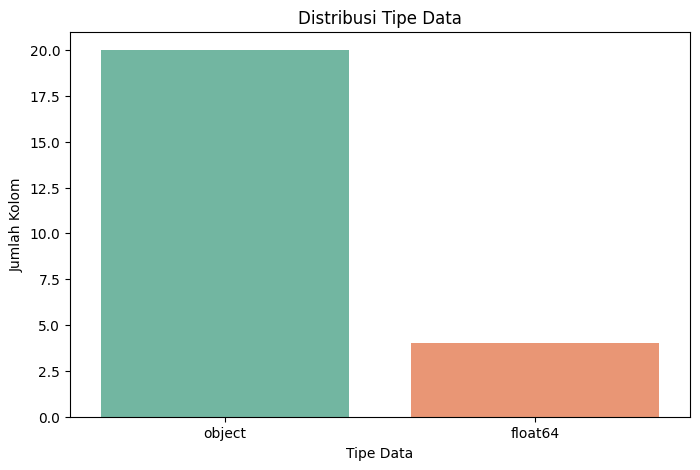

In [20]:
basic_data_info(md)

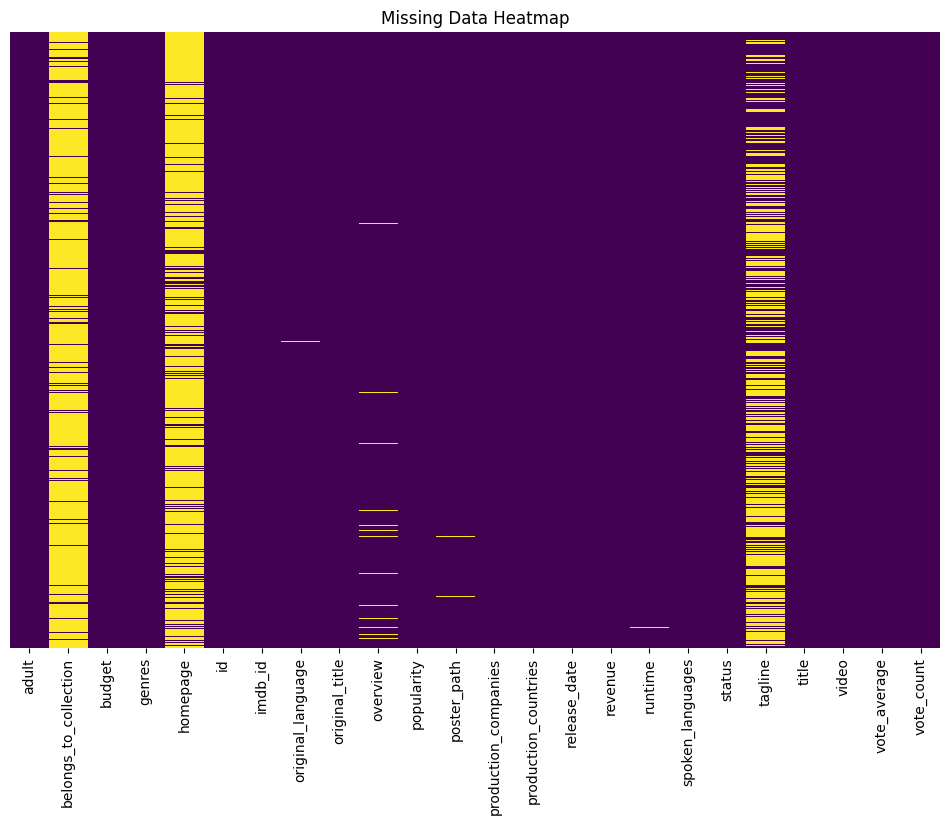

In [21]:
# Membuat heatmap untuk melihat missing values
plt.figure(figsize=(12, 8))  # Mengatur ukuran plot
sns.heatmap(md.isnull(), cbar=False, cmap="viridis", yticklabels=False)

plt.title('Missing Data Heatmap')  # Menambahkan judul
plt.show()

In [22]:
# Menghitung nilai unik (uniqueness) untuk setiap kolom numerik
unique_values = md.nunique()

# Menghitung persentase uniqueness untuk setiap kolom
total_rows = len(md)
unique_percentage = (unique_values / total_rows) * 100

# Menyusun hasil dalam satu DataFrame
uniqueness_df = pd.DataFrame({
    'Unique Values': unique_values,
    'Percentage (%)': unique_percentage.round(2)  # Membulatkan hingga 2 desimal
})

# Filter kolom yang memiliki unique values kurang dari atau sama dengan 6
filtered_uniqueness_df = uniqueness_df[uniqueness_df['Unique Values'] <= 6]

# Menampilkan hasil
print("Kolom dengan Nilai Unik <= 6:")
display(filtered_uniqueness_df)

Kolom dengan Nilai Unik <= 6:


,Unique Values,Percentage (%)
adult,5,0.01
status,6,0.01
video,2,0.00


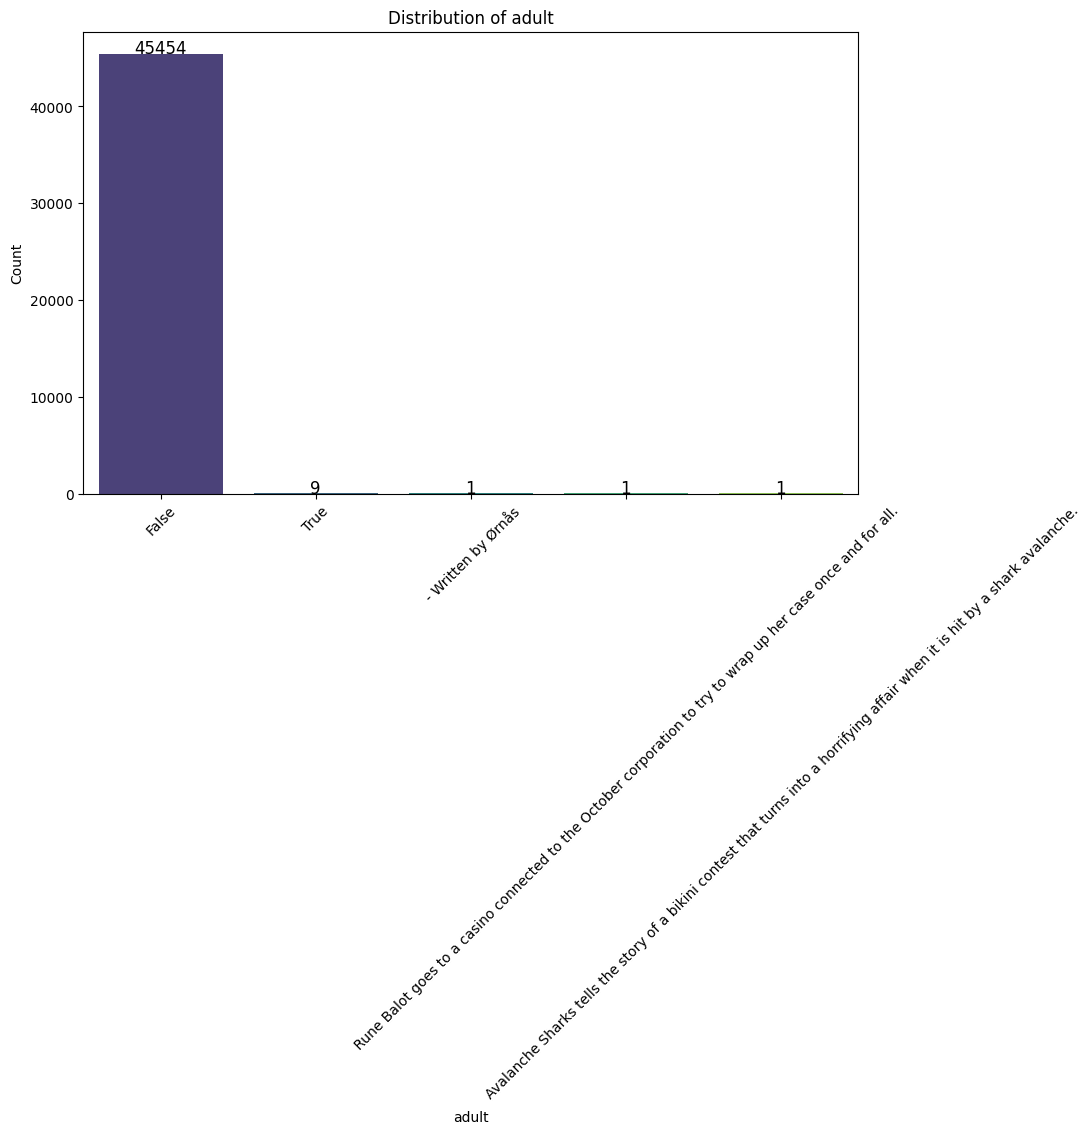

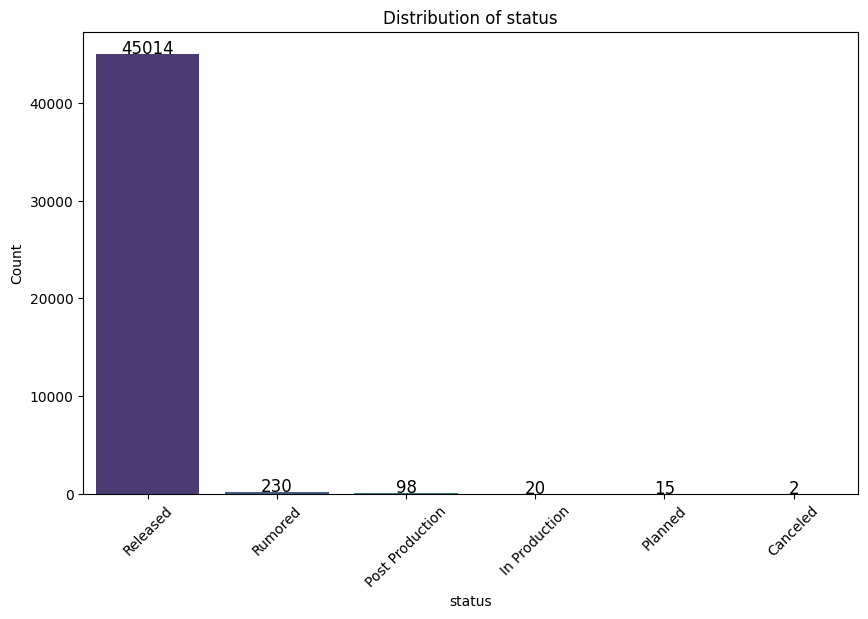

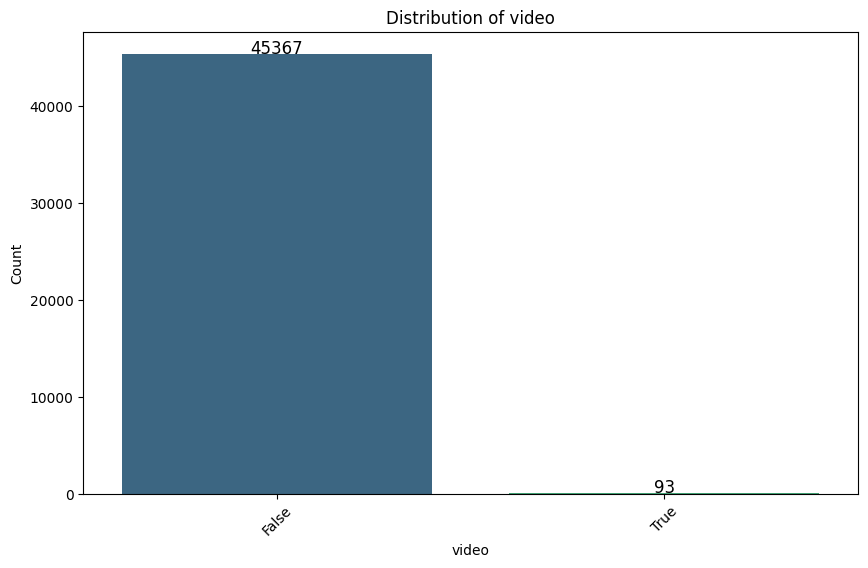

In [23]:
filtered_columns = filtered_uniqueness_df.index.tolist()

# Iterasi dan plot bar chart untuk setiap kolom yang difilter
for col in filtered_columns:
    plt.figure(figsize=(10, 6))
    column_value_counts = md[col].value_counts()  # Hitung jumlah nilai unik
    sns.barplot(x=column_value_counts.index, y=column_value_counts.values, palette='viridis')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Distribution of {col}")

    # Menampilkan jumlah di atas bar
    for i, v in enumerate(column_value_counts.values):
        plt.text(i, v + 0.5, str(v), ha='center', fontsize=12)

    # Memutar x-label agar lebih jelas (misal, 45 derajat atau 90 derajat)
    plt.xticks(rotation=45)  # Ubah rotation=90 jika ingin 90 derajat

    plt.show()

## **3.2 links_small.csv**

In [24]:
links_small.shape

(9125, 3)

Preview Data (5 Teratas):
------------------------------


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0



Informasi Umum:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB
None

Statistik Deskriptif:
------------------------------


,count,mean,std,min,25%,50%,75%,max
movieId,9125.0,31123.291836,40782.633604,1.0,2850.00,6290.0,56274.0,164979.0
imdbId,9125.0,479824.392329,743177.360844,417.0,88846.00,119778.0,428441.0,5794766.0
tmdbId,9112.0,39104.545544,62814.519801,2.0,9451.75,15852.0,39160.5,416437.0



Jumlah Nilai Unik per Kolom:
------------------------------


,0
movieId,9125
imdbId,9125
tmdbId,9112


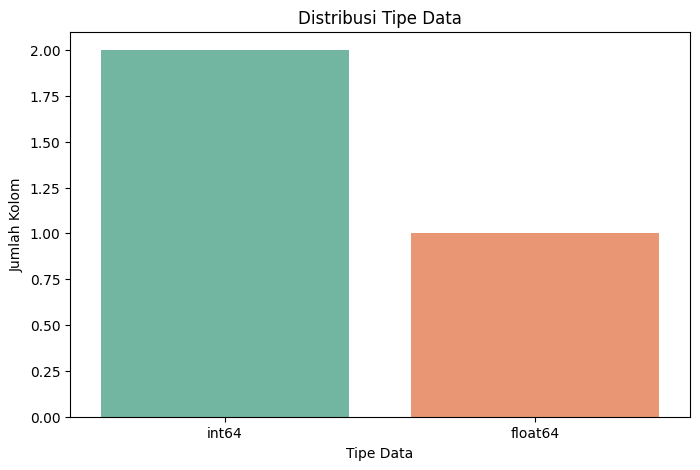

In [25]:
basic_data_info(links_small)

## **3.3 credits.csv**

In [26]:
credits.shape

(45476, 3)

Preview Data (5 Teratas):
------------------------------


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862



Informasi Umum:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None

Statistik Deskriptif:
------------------------------


,count,mean,std,min,25%,50%,75%,max
id,45476.0,108345.997537,112443.796536,2.0,26443.25,60002.5,157302.0,469172.0



Jumlah Nilai Unik per Kolom:
------------------------------


,0
id,45432
crew,44669
cast,43019


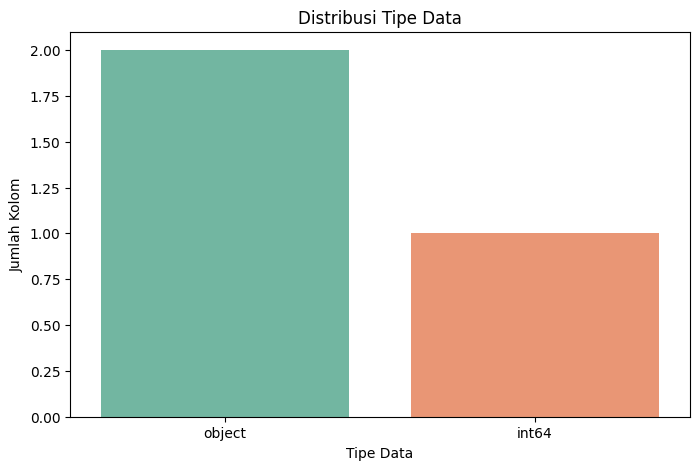

In [27]:
basic_data_info(credits)

## **3.4 keywords.csv**

In [28]:
keywords.shape

(46419, 2)

Preview Data (5 Teratas):
------------------------------


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."



Informasi Umum:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB
None

Statistik Deskriptif:
------------------------------


,count,mean,std,min,25%,50%,75%,max
id,46419.0,109769.951873,113045.780256,2.0,26810.5,61198.0,159908.5,469172.0



Jumlah Nilai Unik per Kolom:
------------------------------


,0
id,45432
keywords,25989


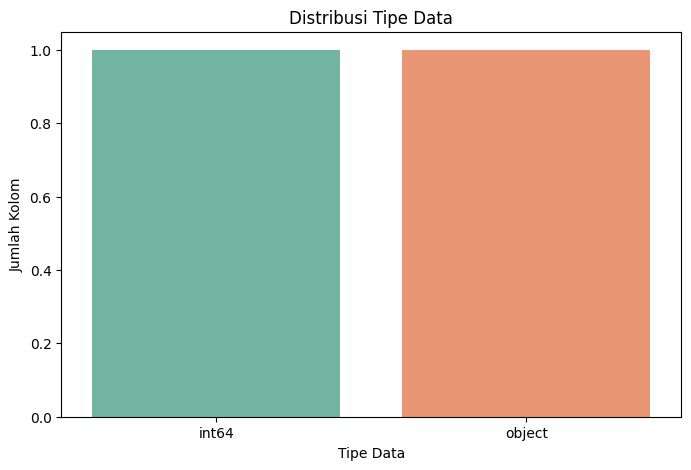

In [29]:
basic_data_info(keywords)

In [30]:
temp_ = keywords.copy()
temp_['keywords_count'] = temp_['keywords'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

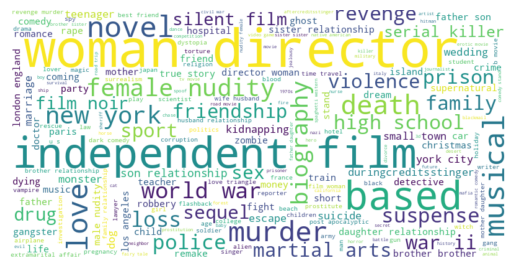

In [31]:
all_keywords = ' '.join([keyword['name'] for keyword_list in temp_['keywords_count'] for keyword in keyword_list])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **3.5 ratings_small.csv**

In [32]:
ratings.shape

(100004, 4)

Preview Data (5 Teratas):
------------------------------


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205



Informasi Umum:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None

Statistik Deskriptif:
------------------------------


,count,mean,std,min,25%,50%,75%,max
userId,100004.0,3.470113e+02,1.951638e+02,1.0,182.0,3.670000e+02,5.200000e+02,6.710000e+02
movieId,100004.0,1.254866e+04,2.636920e+04,1.0,1028.0,2.406500e+03,5.418000e+03,1.639490e+05
rating,100004.0,3.543608e+00,1.058064e+00,0.5,3.0,4.000000e+00,4.000000e+00,5.000000e+00
timestamp,100004.0,1.129639e+09,1.916858e+08,789652009.0,965847824.0,1.110422e+09,1.296192e+09,1.476641e+09



Jumlah Nilai Unik per Kolom:
------------------------------


,0
timestamp,78141
movieId,9066
userId,671
rating,10


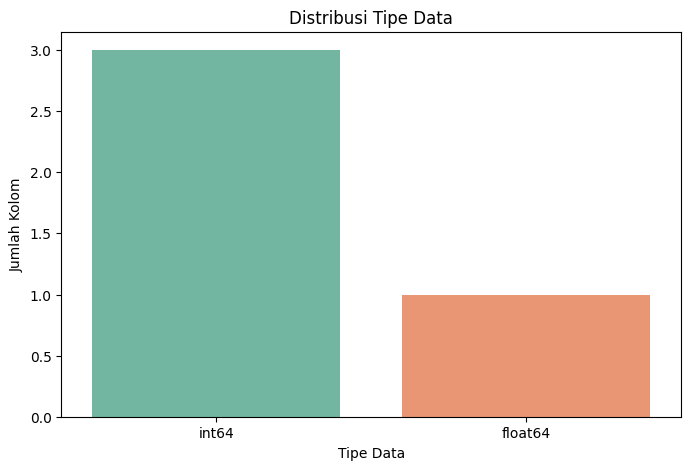

In [33]:
basic_data_info(ratings)

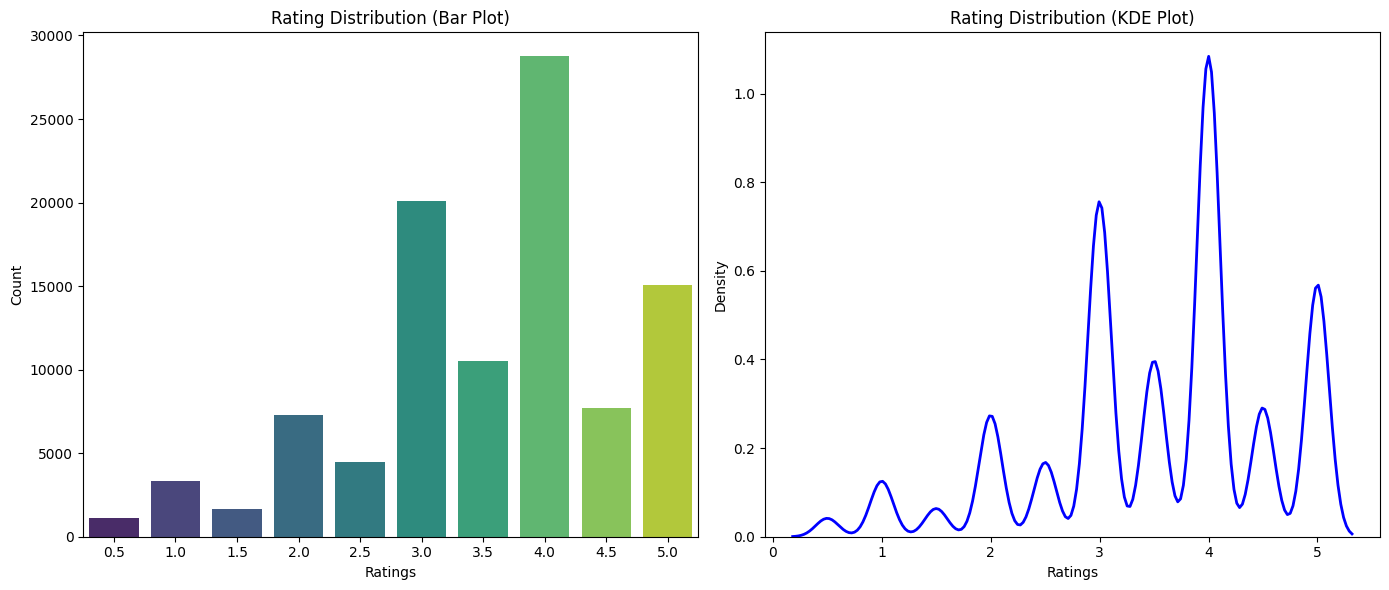

In [34]:
plt.figure(figsize=(14, 6))

# Subplot 1: Bar plot of rating distribution
plt.subplot(1, 2, 1)
rating_counts = ratings['rating'].value_counts()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.title("Rating Distribution (Bar Plot)")

# Subplot 2: KDE plot of rating distribution
plt.subplot(1, 2, 2)
sns.kdeplot(ratings['rating'], color='blue', linewidth=2)
plt.xlabel("Ratings")
plt.ylabel("Density")
plt.title("Rating Distribution (KDE Plot)")

# Show the plot
plt.tight_layout()
plt.show()

# **4. MODELING**

## **4.1 Content Based Recommender**

In [35]:
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
# Mengambil semua nilai dari kolom tmdbId yang tidak null, Kemudian mengonversi hasilnya menjadi tipe integer.

In [36]:
md = md.drop([19730, 29503, 35587]) # drop data yang di kolom adult isinya tidak sesaui dengan yang seharusnya

In [37]:
md['id'] = md['id'].astype('int') # Mengubah tipe data kolom 'id' menjadi integer

In [38]:
smd = md[md['id'].isin(links_small)]
smd.shape

# kode ini digunakan untuk menghasilkan DataFrame baru (smd) yang hanya berisi baris dari md di mana id sesuai dengan nilai yang terdapat di kolom tmdbId dari DataFrame links_small. Ini biasanya dilakukan untuk menyaring data berdasarkan kecocokan ID antara dua dataset.

(9099, 24)

### **4.1.1 Movie Description Based Recommender**


In [39]:
smd['tagline'] = smd['tagline'].fillna('') # Mengganti semua nilai kosong (NaN) dalam kolom tagline dengan string kosong (''). Ini memastikan bahwa tidak ada nilai kosong dalam kolom tersebut, yang dapat mempermudah proses pengolahan data selanjutnya.
smd['description'] = smd['overview'] + smd['tagline'] # Membuat kolom baru yang bernama description dengan menggabungkan konten dari kolom overview dan tagline. Ini bertujuan untuk menciptakan deskripsi yang lebih lengkap untuk setiap film dengan menyertakan informasi dari kedua kolom tersebut.
smd['description'] = smd['description'].fillna('') # smd['description'] = smd['description'].fillna(''): Setelah penggabungan, kode ini mengganti nilai kosong (NaN) dalam kolom description dengan string kosong (''). Ini memastikan bahwa kolom description tidak memiliki nilai kosong, sehingga memudahkan dalam analisis atau visualisasi data selanjutnya.

menggunakan TfidfVectorizer untuk mengubah teks dalam kolom description dari DataFrame smd menjadi matriks TF-IDF. Berikut adalah penjelasan dari setiap komponen:

1. **Inisialisasi `TfidfVectorizer`**:
   - Mengatur parameter untuk analisis teks:
     - `analyzer='word'`: Menganalisis pada tingkat kata.
     - `ngram_range=(1, 2)`: Menghasilkan unigram (kata tunggal) dan bigram (dua kata berdampingan).
     - `min_df=0`: Memasukkan semua kata yang muncul setidaknya sekali.
     - `stop_words='english'`: Mengabaikan kata umum dalam bahasa Inggris.

2. **Menghitung Matriks TF-IDF**:
   - `tfidf_matrix = tf.fit_transform(smd['description'])`: Mengubah kolom `description` menjadi matriks TF-IDF, yang merepresentasikan pentingnya setiap kata dan bigram dalam konteks deskripsi film.

Dengan ini, teks deskripsi film telah diubah menjadi format numerik yang dapat digunakan untuk analisis lebih lanjut.

In [40]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2), min_df=0.0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [41]:
tfidf_matrix.shape

(9099, 268124)

- Fungsi linear_kernel digunakan untuk menghitung kemiripan antara setiap pasangan vektor dalam matriks TF-IDF (tfidf_matrix).

- Hasilnya adalah matriks kemiripan kosinus (cosine_sim) yang menunjukkan seberapa mirip deskripsi film satu dengan yang lainnya. Nilai berkisar antara 0 (tidak mirip) hingga 1 (sangat mirip).

In [42]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [43]:
cosine_sim[0]

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

Sekarang kita memiliki matriks kesamaan kosinus berpasangan untuk semua film dalam kumpulan data kita. Langkah selanjutnya adalah menulis fungsi yang mengembalikan 30 film paling mirip berdasarkan skor kesamaan kosinus.

In [44]:
# Menggabungkan genres dan tags menjadi satu kolom
smd['combined_clean'] = smd['tagline'] + ' | ' + smd['description']

In [45]:
# Mengatur ulang indeks DataFrame smd agar berurutan. dan Menyimpan kolom title ke dalam variabel titles.

smd = smd.reset_index()
titles = smd[['title', 'combined_clean']]
indices = pd.Series(smd.index, index=smd['title'])

In [46]:
def get_recommendations(movie_title, num_recommendations=10, cosine_sim=cosine_sim):
    # Cek apakah input adalah string
    if isinstance(movie_title, str):
        # Mengambil indeks film yang sesuai dengan judul (mengabaikan huruf besar/kecil)
        try:
            movie_index = smd[smd['title'].str.contains(movie_title, case=False, na=False)].index[0]
        except IndexError:
            print(f"Film dengan judul '{movie_title}' tidak ditemukan.")
            return None
    else:
        print("Identifier harus nama film dalam string!")
        return None

    # Menghitung skor kemiripan berdasarkan cosine similarity
    similarity_scores = list(enumerate(cosine_sim[movie_index]))  # Dapatkan skor kemiripan
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)  # Urutkan skor
    top_scores = similarity_scores[1:num_recommendations+1]  # Ambil rekomendasi sesuai jumlah yang diinginkan
    recommended_indices = [i[0] for i in top_scores]  # Ekstrak indeks film

    # Dapatkan film yang direkomendasikan
    recommendations = smd.iloc[recommended_indices][['title', 'combined_clean']]

    # Menghitung precision berdasarkan kemiripan genres dan tags
    target_tags = set(smd.loc[movie_index, 'combined_clean'].split())
    relevant_recommendations = recommendations[recommendations['combined_clean'].apply(lambda x: len(target_tags.intersection(set(x.split()))) > 0)]

    # Menghitung precision
    precision = len(relevant_recommendations) / num_recommendations

    print(f'Precision: {precision:.2f}\n')

    return recommendations.head(num_recommendations)

In [47]:
get_recommendations('The Godfather', num_recommendations=10)

Precision: 1.00



,title,combined_clean
973,The Godfather: Part II,"I don't feel I have to wipe everybody out, Tom..."
8387,The Family,Some call it organized crime. Others call it f...
3509,Made,Welcome to disorganized crime. | Two aspiring ...
4196,Johnny Dangerously,Organized crime has never been this disorganiz...
29,Shanghai Triad,In 1930's Shanghai violence was not the proble...
5667,Fury,TWO LOVERS...VICTIMS OF MOB VIOLENCE! | When a...
2412,American Movie,| AMERICAN MOVIE is the story of filmmaker Ma...
1582,The Godfather: Part III,All the power on earth can't change destiny. |...
4221,8 Women,Living in a house full of women can be murder....
2159,Summer of Sam,No one is safe from son of sam | Spike Lee's t...


In [48]:
get_recommendations('The Dark Knight', num_recommendations=10)

Precision: 1.00



,title,combined_clean
7931,The Dark Knight Rises,The Legend Ends | Following the death of Distr...
132,Batman Forever,"Courage now, truth always... | The Dark Knight..."
1113,Batman Returns,"The Bat, the Cat, the Penguin. | Having defeat..."
8227,"Batman: The Dark Knight Returns, Part 2",Justice Returns... Vengeance Returns... Redemp...
7565,Batman: Under the Red Hood,Dare to Look Beneath the Hood. | Batman faces ...
524,Batman,Have you ever danced with the devil in the pal...
7901,Batman: Year One,A merciless crime turns a man into an outlaw. ...
2579,Batman: Mask of the Phantasm,The Dark Knight fights to save Gotham city fro...
2696,JFK,The story that won’t go away. | New Orleans Di...
8165,"Batman: The Dark Knight Returns, Part 1",Old heroes never die. They just get darker. | ...


### **4.1.2 Metadata Based Content Recommender**


In [49]:
# memastikan bahwa kolom id di tiga DataFrame (keywords, credits, dan md) memiliki tipe data yang sama, yaitu integer
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
md['id'] = md['id'].astype('int')

In [50]:
md.shape

(45463, 24)

In [51]:
# menggabungkan informasi dari dua DataFrame (credits dan keywords) ke dalam DataFrame md berdasarkan kolom id
md = md.merge(credits, on='id')
md = md.merge(keywords, on='id')

In [52]:
# menyaring DataFrame md untuk hanya menyertakan film yang juga terdapat dalam links_small
smd = md[md['id'].isin(links_small)]
smd.shape

(9219, 27)

In [53]:
'''
Menggunakan fungsi literal_eval untuk mengubah nilai-nilai dalam kolom cast, crew,
dan keywords dari string (teks) menjadi objek Python yang sesuai (list atau dictionary),
sehingga elemen-elemen di dalamnya bisa diakses dan dimanipulasi.
'''
smd['cast'] = smd['cast'].apply(literal_eval)
smd['crew'] = smd['crew'].apply(literal_eval)
smd['keywords'] = smd['keywords'].apply(literal_eval)

'''
Menghitung jumlah elemen di dalam cast dan crew untuk setiap film,
lalu menyimpan hasilnya di kolom baru, cast_size dan crew_size.
'''
smd['cast_size'] = smd['cast'].apply(lambda x: len(x))
smd['crew_size'] = smd['crew'].apply(lambda x: len(x))

In [54]:
# mengambil nama sutradara dari list anggota kru film. Jika tidak ada sutradara, fungsi akan mengembalikan nilai NaN.
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

smd['director'] = smd['crew'].apply(get_director)

In [55]:
smd['cast'] = smd['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else []) # Ambil nama aktor dari cast
smd['cast'] = smd['cast'].apply(lambda x: x[:3] if len(x) >=3 else x) # Batasi jumlah aktor yang diambil hingga 3

smd['keywords'] = smd['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else []) # Ambil nama dari keywords

In [56]:
smd.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords,cast_size,crew_size,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles]","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[jealousy, toy, boy, friendship, friends, riva...",13,106,John Lasseter
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[board game, disappearance, based on children'...",26,16,Joe Johnston


Pendekatan dalam membangun sistem rekomendasi akan sangat sederhana. Rencana yang akan dilakukan adalah membuat dump metadata untuk setiap film yang terdiri dari genre, sutradara, aktor utama, dan kata kunci. Selanjutnya, Count Vectorizer akan digunakan untuk membuat matriks hitung seperti yang dilakukan pada Rekomendasi Deskripsi. Langkah-langkah berikutnya mirip dengan yang dilakukan sebelumnya: menghitung cosine similarities dan mengembalikan film-film yang paling mirip.

Langkah-langkah yang diikuti dalam mempersiapkan data genre dan kredit adalah:

1. Menghapus spasi dan mengubah semua fitur menjadi huruf kecil. Dengan cara ini, sistem tidak akan bingung antara Johnny Depp dan Johnny Galecki.
2. Menyebutkan sutradara sebanyak tiga kali untuk memberikan bobot lebih dibandingkan dengan seluruh anggota pemeran.

In [57]:
smd['cast'] = smd['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [58]:
smd['director'] = smd['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
smd['director'] = smd['director'].apply(lambda x: [x,x, x])

In [59]:
# Mengubah 'keywords' menjadi Series dan menghitung frekuensi kata kunci
keyword_series = smd['keywords'].explode().reset_index(drop=True)
keyword_counts = keyword_series.value_counts()

# Ambil hanya kata kunci yang muncul lebih dari sekali
frequent_keywords = keyword_counts[keyword_counts > 1]

In [60]:
frequent_keywords = frequent_keywords.value_counts()
frequent_keywords[:5]

,count
count,
2,2170
3,1041
4,663
5,436
6,359


In [61]:
frequent_keywords = frequent_keywords[frequent_keywords > 1]

In [62]:
# Menggunakan stemmer untuk mengubah kata menjadi bentuk dasarnya
stemmer = SnowballStemmer('english')
stemmed_example = stemmer.stem('dogs')

# Fungsi untuk memfilter kata kunci
def filter_keywords(x):
    return [word for word in x if word in frequent_keywords]

In [63]:
# Terapkan fungsi filter ke kolom 'keywords'
smd['keywords'] = smd['keywords'].apply(filter_keywords)
# Stemming kata kunci
smd['keywords'] = smd['keywords'].apply(lambda x: [stemmer.stem(word) for word in x])
# Menghapus spasi dari setiap kata dan mengubah menjadi huruf kecil
smd['keywords'] = smd['keywords'].apply(lambda x: [word.replace(" ", "").lower() for word in x])

In [64]:
smd[["cast", "genres"]]

,cast,genres
0,"[tomhanks, timallen, donrickles]","[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[robinwilliams, jonathanhyde, kirstendunst]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[waltermatthau, jacklemmon, ann-margret]","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[whitneyhouston, angelabassett, lorettadevine]","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[stevemartin, dianekeaton, martinshort]","[{'id': 35, 'name': 'Comedy'}]"
...,...,...
45985,"[veronicataylor, rachaellillis, maddieblaustein]","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
46424,"[lisalovenkongsli, johannesbahkuhnke, clarawet...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
46425,"[lisalovenkongsli, johannesbahkuhnke, clarawet...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
46426,"[lisalovenkongsli, johannesbahkuhnke, clarawet...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."


In [65]:
# Mengubah 'director' menjadi list
smd['director'] = smd['director'].apply(lambda x: [x] if isinstance(x, str) else x)

# Mengambil nama dari genre
smd['genres'] = smd['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Membuat kolom 'combined_clean' dengan menggabungkan kolom yang relevan
smd['combined_clean'] = smd.apply(lambda x: x['keywords'] + x['cast'] + x['director'] + x['genres'], axis=1)

# Mengubah list dalam 'combined_clean' menjadi string
smd['combined_clean'] = smd['combined_clean'].apply(lambda x: ' '.join(x))

In [66]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2), min_df=0.0, stop_words='english')
count_matrix = count.fit_transform(smd['combined_clean'])

- Menggunakan CountVectorizer dari sklearn.feature_extraction.text untuk membuat matriks hitung dari kolom soup yang sudah dibentuk sebelumnya.

- Dengan matriks hitung ini, langkah selanjutnya umumnya adalah menghitung similarity antar film berdasarkan konten mereka. Matriks ini menjadi dasar untuk proses perhitungan kesamaan (seperti cosine similarity) yang akan digunakan dalam sistem rekomendasi film

In [67]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [68]:
smd = smd.reset_index()
titles = smd[['title', 'combined_clean']]
indices = pd.Series(smd.index, index=smd['title'])

Fungsi `get_recommendations` yang telah ditulis sebelumnya akan digunakan kembali. Karena cosine similarity scores kita telah berubah, kita mengharapkan fungsi ini memberikan hasil yang berbeda (dan mungkin lebih baik). Mari kita periksa rekomendasi untuk film *The Dark Knight* sekali lagi dan lihat apa yang didapatkan kali ini.

In [69]:
titles[titles['title'] == "The Dark Knight"]

,title,combined_clean
6945,The Dark Knight,christianbale michaelcaine heathledger christo...


In [70]:
get_recommendations('The Dark Knight', num_recommendations=10)

Precision: 0.10



,title,combined_clean
6759,Death at a Funeral,matthewmacfadyen keeleyhawes andynyman frankoz...
3708,Bad Timing,artgarfunkel theresarussell harveykeitel nicol...
7469,Ninja,scottadkins toddjensen tsuyoshiihara isaacflor...
8559,Knights of Badassdom,peterdinklage ryankwanten summerglau joelynch ...
3832,Funny Girl,barbrastreisand omarsharif kaymedford williamw...
6613,Turistas,joshduhamel melissageorge oliviawilde johnstoc...
6587,The Prestige,hughjackman christianbale michaelcaine christo...
2655,Beautiful People,charlottecoleman charleskay rosalindayres jasm...
5011,Hero,jetli tonyleungchiu-wai maggiecheung zhangyimo...
2725,A Night to Remember,kennethmore ronaldallen robertayres roywardbak...


## **4.2 Colaborative Filtering**

In [71]:
print("Data rating:")
display(ratings.sample(2))

print("\nData film:")
display(smd.sample(2))

Data rating:


,userId,movieId,rating,timestamp
30678,219,47,4.0,997730388
28149,205,135887,2.0,1442137400



Data film:


,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords,cast_size,crew_size,director,combined_clean
8867,28022,False,NaN,8000000,[],NaN,283235,tt2891174,en,99 Homes,"After his family is evicted from their home, p...",6.60913,/mw4b2KLWInQ3Po5uOOTU6Q0Y5VP.jpg,"[{'name': 'Imagenation Abu Dhabi FZ', 'id': 67...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-09,1411927.0,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Greed is the only game in town.,99 Homes,False,6.8,240.0,"[andrewgarfield, lauradern, michaelshannon]","[{'credit_id': '53ce96a2c3a36877640051e4', 'de...",[],43,23,"[raminbahrani, raminbahrani, raminbahrani]",andrewgarfield lauradern michaelshannon raminb...
3387,4131,False,"{'id': 34055, 'name': 'Pokémon Collection', 'p...",16000000,[],http://movies.warnerbros.com/pk3/,10991,tt0235679,ja,Pokémon 3: The Movie,When Molly Hale's sadness of her father's disa...,10.264597,/5ILjS6XB5deiHop8SXPsYxXWVPE.jpg,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': '4...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2000-07-08,68411275.0,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pokémon: Spell of the Unknown,Pokémon: Spell of the Unknown,False,6.0,143.0,"[veronicataylor, rachaellillis, ericstuart]","[{'credit_id': '52fe43de9251416c750213ff', 'de...",[],3,4,"[michaelhaigney, michaelhaigney, michaelhaigney]",veronicataylor rachaellillis ericstuart michae...


In [72]:
# Membuat objek Reader
reader = Reader()

# Memuat data dari DataFrame
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [73]:
# Melakukan cross-validation untuk mengevaluasi model
results = cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

# Menghitung rata-rata RMSE dan MAE
mean_rmse = results['test_rmse'].mean()
mean_mae = results['test_mae'].mean()

print(f"\nRata-rata RMSE: {mean_rmse:.4f}")
print(f"Rata-rata MAE: {mean_mae:.4f}")

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8939  0.8987  0.8936  0.8895  0.8797  0.8940  0.8866  0.9079  0.8830  0.8939  0.8921  0.0076  
MAE (testset)     0.6841  0.6892  0.6847  0.6884  0.6768  0.6902  0.6860  0.6976  0.6796  0.6847  0.6861  0.0055  
Fit time          2.35    1.97    1.96    2.05    1.94    3.19    2.87    1.96    1.85    1.77    2.19    0.45    
Test time         0.06    0.07    0.06    0.06    0.10    0.11    0.09    0.07    0.07    0.06    0.08    0.02    

Rata-rata RMSE: 0.8921
Rata-rata MAE: 0.6861


In [74]:
# Membangun full trainset
trainset = data.build_full_trainset()

# Melatih model SVD
svd = SVD()
svd.fit(trainset)

In [75]:
# Menampilkan rating yang diberikan oleh user dengan userId tertentu
user_id = 1
user_ratings = ratings[ratings['userId'] == user_id]
print(f"\nRating yang diberikan oleh pengguna {user_id}:")
print(user_ratings)


Rating yang diberikan oleh pengguna 1:
    userId  movieId  rating   timestamp
0        1       31     2.5  1260759144
1        1     1029     3.0  1260759179
2        1     1061     3.0  1260759182
3        1     1129     2.0  1260759185
4        1     1172     4.0  1260759205
5        1     1263     2.0  1260759151
6        1     1287     2.0  1260759187
7        1     1293     2.0  1260759148
8        1     1339     3.5  1260759125
9        1     1343     2.0  1260759131
10       1     1371     2.5  1260759135
11       1     1405     1.0  1260759203
12       1     1953     4.0  1260759191
13       1     2105     4.0  1260759139
14       1     2150     3.0  1260759194
15       1     2193     2.0  1260759198
16       1     2294     2.0  1260759108
17       1     2455     2.5  1260759113
18       1     2968     1.0  1260759200
19       1     3671     3.0  1260759117


In [76]:
# Memprediksi rating untuk film yang belum ditonton
all_movie_ids = ratings['movieId'].unique()
watched_movie_ids = user_ratings['movieId'].unique()
unwatched_movie_ids = [mid for mid in all_movie_ids if mid not in watched_movie_ids]

In [77]:
# Mengambil prediksi rating untuk film yang belum ditonton
predicted_ratings = []
for movie_id in unwatched_movie_ids:
    predicted_rating = svd.predict(user_id, movie_id).est
    predicted_ratings.append((movie_id, predicted_rating))

# Mengurutkan film berdasarkan rating yang diprediksi
predicted_ratings.sort(key=lambda x: x[1], reverse=True)

In [78]:
# Mengambil 10 rekomendasi film teratas
top_n = predicted_ratings[:10]
recommended_movie_ids = [mid for mid, _ in top_n]

# Mengambil detail film dari dataset
recommended_movies = smd[smd['id'].isin(recommended_movie_ids)][['original_title', 'vote_average', 'overview']]

# Menampilkan rekomendasi film sebagai DataFrame
recommended_movies_df = pd.DataFrame(recommended_movies)

# Menampilkan DataFrame hasil rekomendasi
print(f'\nTop 10 rekomendasi film untuk pengguna {user_id}:')
recommended_movies_df.reset_index(drop=True, inplace=True)  # Reset indeks agar lebih rapi
display(recommended_movies_df)


Top 10 rekomendasi film untuk pengguna 1:


,original_title,vote_average,overview
0,The 39 Steps,7.4,"While on vacation in London, Canadian Richard ..."
1,Солярис,7.7,Ground control has been receiving strange tran...
2,The Million Dollar Hotel,5.9,The Million Dollar Hotel starts with a jump fr...
3,Birdman of Alcatraz,7.0,"After killing a prison guard, convict Robert S..."
4,Die Büchse der Pandora,7.6,The rise and inevitable fall of an amoral but ...
